# CSE - 7641 Machine Learning: Assignment 1

You should implement five learning algorithms. They are for:

* Decision trees with some form of pruning*
* Neural networks*
* Boosting*
* Support Vector Machines*
* k-nearest neighbors*

Each algorithm is described in detail in your textbook, the handouts, and all over the web. In fact, instead of implementing the algorithms yourself, you may (and by may I mean should) use software packages that you find elsewhere; however, if you do so you should provide proper attribution. Also, you will note that you have to do some fiddling to get good results, graphs and such, so even if you use another's package, you may need to be able to modify it in various ways.

In [170]:
import warnings
warnings.filterwarnings('ignore')

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier
from sklearn.ensemble import  RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score, GridSearchCV, KFold, GroupKFold, GroupShuffleSplit, learning_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC

from sklearn.metrics import explained_variance_score, make_scorer
from keras.models import Sequential
from keras.layers import Dense

# fix random seed for reproducibility
np.random.seed(121)
%matplotlib inline

In [125]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

In [8]:
# Get the data sets
from sklearn.datasets import load_digits, load_breast_cancer
data_img, data_cancer = load_digits(), load_breast_cancer()
print(data_img.keys(), "\n",data_cancer.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR']) 
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [44]:
x1, y1 = pd.DataFrame(data_img["data"]), pd.Series(data_img["target"])
x2, y2 = pd.DataFrame(data_cancer["data"],columns=data_cancer.feature_names), pd.Series(data_cancer["target"])

In [63]:
# shuffle the indices first
n1 = np.random.RandomState(seed=121).permutation(range(len(x1)))
n2 =np.random.RandomState(seed=121).permutation(range(len(x2)))

In [75]:
# Split indices
t1 ,v1 , r1 = x1.iloc[-400:,:].index, x1.iloc[-800:-400,:].index, x1.iloc[:-800,:].index
t2 ,v2 , r2 = x2.iloc[-114:,:].index, x2.iloc[-228:-114,:].index, x2.iloc[:-228,:].index
print(t1, v1, r1)
print(t2, v2, r2)

RangeIndex(start=1397, stop=1797, step=1) RangeIndex(start=997, stop=1397, step=1) RangeIndex(start=0, stop=997, step=1)
RangeIndex(start=455, stop=569, step=1) RangeIndex(start=341, stop=455, step=1) RangeIndex(start=0, stop=341, step=1)


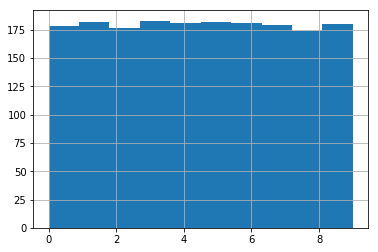

In [93]:
y1.hist(bins=10)

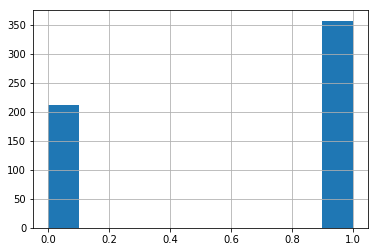

In [51]:
y2.hist(bins=10)

In [95]:
# dataset splits
x1_ts, x1_val, x1_tr = x1.iloc[t1,:], x1.iloc[v1,:], x1.iloc[r1,:]
y1_ts, y1_val, y1_tr = y1[t1], y1[v1], y1[r1]
x2_ts, x2_val, x2_tr = x2.iloc[t2,:], x2.iloc[v2,:], x2.iloc[r2,:]
y2_ts, y2_val, y2_tr = y2[t2], y2[v2], y2[r2]

In [107]:
x1_ = x1.iloc[list(r1)+list(v1),:]
y1_ = y1[list(r1)+list(v1)]
x2_ = x2.iloc[list(r2)+list(v2),:]
y2_ = y2[list(r2)+ list(v2)]
print(len(x1_), len(y1_), len(x2_), len(y2_))

1397 1397 455 455


In [161]:
def plot_curve(c, dataset):
    # instantiate
    clf = c[1]
    # fit
    clf.fit(X, y)
      
    train_sizes, train_scores, test_scores = learning_curve(clf, X, y, n_jobs=-1, cv=cv, scoring="accuracy",
                                                            train_sizes=np.linspace(.1, 1.0, 5), verbose=0)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title(c[0]+ " on Dataset: "+ dataset)
    plt.legend(loc="best")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.gca().invert_yaxis()
    
    # box-like grid
    plt.grid()
    
    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    plt.ylim(-.1,1.1)
    plt.show()

In [156]:
def set_data(dataset):
    if dataset=="digits":
        dataset="digits"
        X, y =x1_, y1_
    else:
        dataset="diagnosis"
        X, y =x2_, y2_
    return X, y, dataset

In [157]:
#size = len(r1)
cv = KFold(n_splits=5, shuffle=True)

In [166]:
c1 = ["DecisionTreeClassifier", DecisionTreeClassifier(random_state=121)]
c2 = ["MLPClassifier", MLPClassifier(random_state=121)]
c3 = ["AdaBoostClassifier", AdaBoostClassifier(random_state=121)]
c4 = ["Suppor Vector Machine - Classifier", SVC(random_state=121)]
c5 = ["KNeighborsClassifier", KNeighborsClassifier()]

In [ ]:
par = [1, 3, 5, 7, 15, 21, 35, 50]
c1b = ["DecisionTreeClassifier", DecisionTreeClassifier(random_state=121, min_samples_leaf=k)]

''

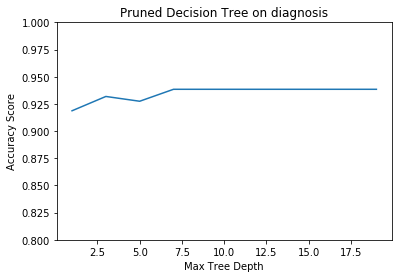

In [194]:
X, y, dataset = set_data("")
results=[]
for i in range(1,21,2):
    clf = DecisionTreeClassifier(max_depth=i, random_state=121)
    # Perform 3-fold cross validation 
    scores = cross_val_score(estimator=clf, X=X, y=y, cv=3, n_jobs=-1)
    results.append(scores.mean())
#print(results)

plt.plot(range(1,21,2), results)
plt.title("Pruned Decision Tree on "+ dataset)
plt.ylim(0.8,1)
plt.xlabel("Max Tree Depth")
plt.ylabel("Accuracy Score")
;

''

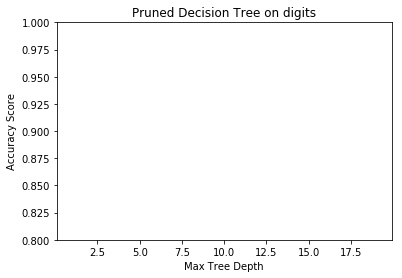

In [196]:
X, y, dataset = set_data("digits")
results=[]
for i in range(1,21,2):
    clf = DecisionTreeClassifier(min_samples_leaf=i, random_state=121)
    # Perform 3-fold cross validation 


In [ ]:
c2b = ["MLPClassifier", MLPClassifier(random_state=121)]

''

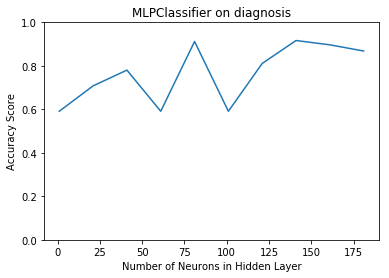

In [198]:
X, y, dataset = set_data("")
results=[]
for i in range(1,200,20):
    clf = MLPClassifier(random_state=121, hidden_layer_sizes=(i,))
    # Perform 3-fold cross validation 
    scores = cross_val_score(estimator=clf, X=X, y=y, cv=3, n_jobs=-1)
    results.append(scores.mean())
#print(results)

plt.plot(range(1,200,20), results)
plt.title("MLPClassifier on "+ dataset)
plt.ylim(0,1)
plt.xlabel("Number of Neurons in Hidden Layer")
plt.ylabel("Accuracy Score")
;

''

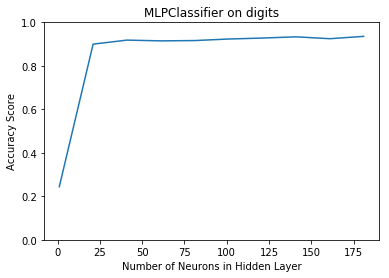

In [199]:
X, y, dataset = set_data("digits")
results=[]
for i in range(1,200,20):
    clf = MLPClassifier(random_state=121, hidden_layer_sizes=(i,))
    # Perform 3-fold cross validation 
    scores = cross_val_score(estimator=clf, X=X, y=y, cv=3, n_jobs=-1)
    results.append(scores.mean())
#print(results)

plt.plot(range(1,200,20), results)
plt.title("MLPClassifier on "+ dataset)
plt.ylim(0,1)
plt.xlabel("Number of Neurons in Hidden Layer")
plt.ylabel("Accuracy Score")
;

In [167]:
c3b = ["AdaBoostClassifier", AdaBoostClassifier(random_state=121)]
c4b = ["Suppor Vector Machine - Classifier", SVC(random_state=121)]
c5b = ["KNeighborsClassifier", KNeighborsClassifier()]

**Decision Trees.** For the decision tree, you should implement or steal a decision tree algorithm (and by "implement or steal" I mean "steal"). Be sure to use some form of pruning. You are not required to use information gain (for example, there is something called the GINI index that is sometimes used) to split attributes, but you should describe whatever it is that you do use.

No handles with labels found to put in legend.


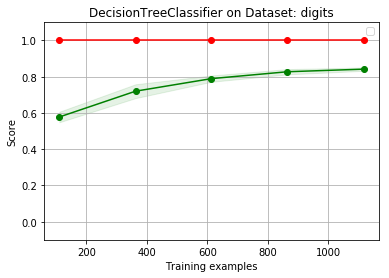

No handles with labels found to put in legend.


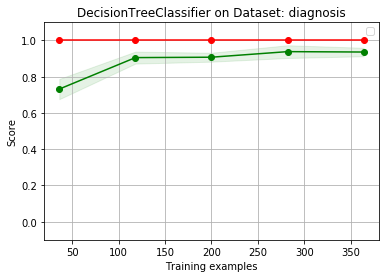

In [177]:
X, y, dataset = set_data("digits")
a=plot_curve(c1, dataset)
X, y, dataset = set_data("")
b=plot_curve(c1, dataset)

**Neural Networks.** For the neural network you should implement or steal your favorite kind of network and training algorithm. You may use networks of nodes with as many layers as you like and any activation function you see fit.

No handles with labels found to put in legend.


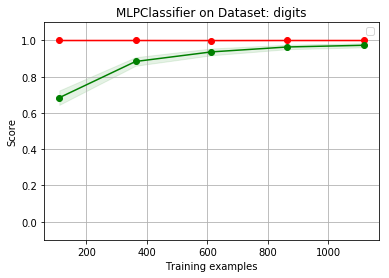

No handles with labels found to put in legend.


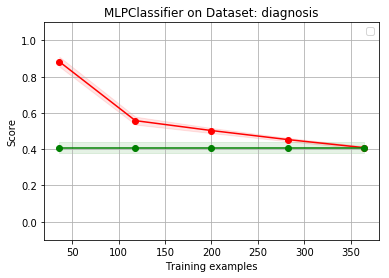

In [173]:
X, y, dataset = set_data("digits")
plot_curve(c2, dataset)
X, y, dataset = set_data("")
plot_curve(c2, dataset)

**Boosting.** Implement or steal a boosted version of your decision trees. As before, you will want to use some form of pruning, but presumably because you're using boosting you can afford to be much more aggressive about your pruning.

No handles with labels found to put in legend.


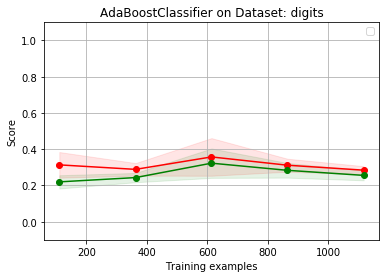

No handles with labels found to put in legend.


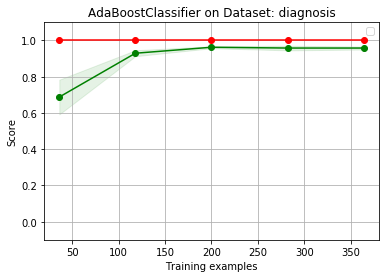

In [174]:
X, y, dataset = set_data("digits")
plot_curve(c3, dataset)
X, y, dataset = set_data("")
plot_curve(c3, dataset)

**Support Vector Machines.** You should implement (for sufficently loose definitions of implement including "download") SVMs. This should be done in such a way that you can swap out kernel functions. I'd like to see at least two.

No handles with labels found to put in legend.


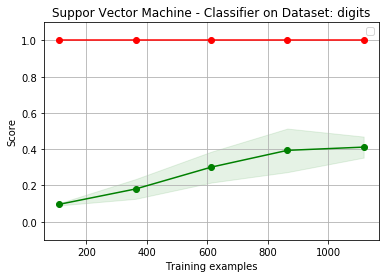

No handles with labels found to put in legend.


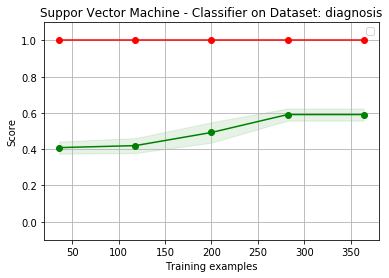

In [175]:
#clf = SVC(gamma='auto')
#clf.fit(X, y) 

#print(clf.predict([[-0.8, -1]]))
X, y, dataset = set_data("digits")
plot_curve(c4, dataset)
X, y, dataset = set_data("")
plot_curve(c4, dataset)

No handles with labels found to put in legend.


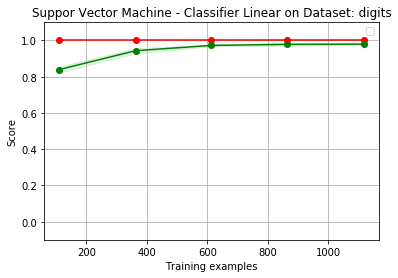

No handles with labels found to put in legend.


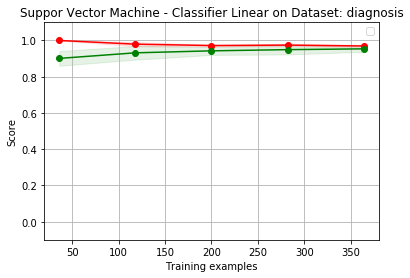

In [200]:
cc1=["Suppor Vector Machine - Classifier Linear", SVC(random_state=121, kernel="linear")]
X, y, dataset = set_data("digits")
plot_curve(cc1, dataset)
X, y, dataset = set_data("")
plot_curve(cc1, dataset)

No handles with labels found to put in legend.


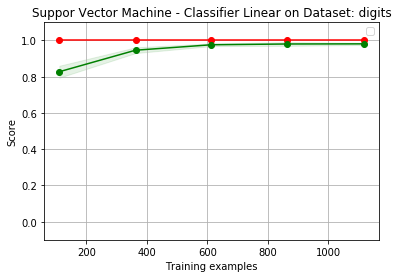

No handles with labels found to put in legend.


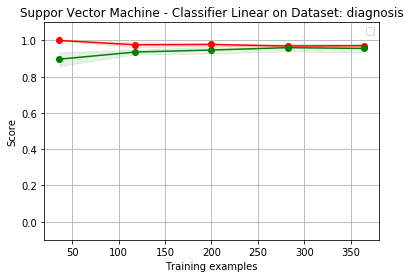

In [202]:
cc1=["Suppor Vector Machine - Classifier Linear", SVC(random_state=121, kernel="linear", degree=1)]
X, y, dataset = set_data("digits")
plot_curve(cc1, dataset)
X, y, dataset = set_data("")
plot_curve(cc1, dataset)

In [ ]:
cc1=["Suppor Vector Machine - Classifier Linear", SVC(random_state=121, deg)]
X, y, dataset = set_data("digits")
plot_curve(cc1, dataset)
X, y, dataset = set_data("")
plot_curve(cc1, dataset)

**k-Nearest Neighbors.** You should "implement" (the quotes mean I don't mean it: steal the code) kNN. Use different values of k.

No handles with labels found to put in legend.


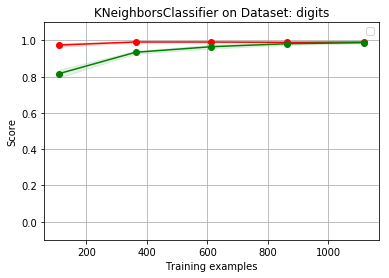

No handles with labels found to put in legend.


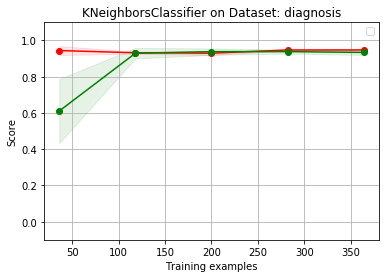

In [176]:
#neigh = KNeighborsClassifier(n_neighbors=3)
#neigh.fit(X, y) 

X, y, dataset = set_data("digits")
plot_curve(c5, dataset)
X, y, dataset = set_data("")
plot_curve(c5, dataset)

''

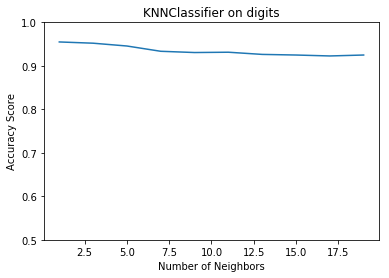

In [207]:
X, y, dataset = set_data("digits")
results=[]
for i in range(1,21,2):
    clf = KNeighborsClassifier(n_neighbors=i)
    # Perform 3-fold cross validation 
    scores = cross_val_score(estimator=clf, X=X, y=y, cv=3, n_jobs=-1)
    results.append(scores.mean())
#print(results)

plt.plot(range(1,21,2), results)
plt.title("KNNClassifier on "+ dataset)
plt.ylim(0.5,1)
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy Score")
;

''

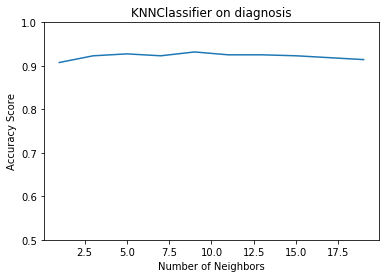

In [206]:
X, y, dataset = set_data("")
results=[]
for i in range(1,21,2):
    clf = KNeighborsClassifier(n_neighbors=i)
    # Perform 3-fold cross validation 
    scores = cross_val_score(estimator=clf, X=X, y=y, cv=3, n_jobs=-1)
    results.append(scores.mean())
#print(results)

plt.plot(range(1,21,2), results)
plt.title("KNNClassifier on "+ dataset)
plt.ylim(0.5,1)
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy Score")
;

**Testing.** In addition to implementing (wink), the algorithms described above, you should design two interesting classification problems. For the purposes of this assignment, a classification problem is just a set of training examples and a set of test examples. I don't care where you get the data. You can download some, take some from your own research, or make some up on your own. Be careful about the data you choose, though. You'll have to explain why they are interesting, use them in later assignments, and come to really care about them.

In [7]:
# Indian Liver Data
# Load_digits (MNIST dataset)

In [31]:
# How do you learn the model, Steps for each model you are learning
# Learning Curve Analysis
# Model Complexity Analysis
# Performance you see for each method/model and why? -  Metrics Accuracy, AUC, Confusion Matrix, Precision and Recall 
# Finally, do a comparison across everything and then summary on what you saw